18:16:03-INFO-Path for logging: C:\Users\sharief.091\.oemof\log_files\model_team_1.log
18:16:03-INFO-Used oemof version: 0.3.2
18:16:03-INFO-Initialize the energy system
18:16:03-INFO-Create oemof objects
18:16:03-INFO-Optimise the energy system
18:16:33-INFO-Solve the optimization problem of team 1
18:17:07-INFO-Optimization successful...
18:17:07-INFO-Store the energy system with the results.
18:17:19-INFO-Restoring attributes will overwrite existing attributes.

-- Results (Team FORCHDORF ) --
CO2-Emission: 1583.62 t/a
Total Costs of Energy System per Year: 14.97 Mio. €/a
Self-Sufficiency: 90.28 %

dict_keys([('Hydrogen_SMR', 'hydrogen'), ('PV', 'electricity'), ('PV_pp', 'electricity'), ('boiler', 'heat'), ('chp', 'electricity'), ('chp', 'heat'), ('electricity', 'Hydrogen_SMR'), ('electricity', 'demand_el'), ('electricity', 'electrolyser'), ('electricity', 'excess_bel'), ('electricity', 'heat_pump'), ('electricity', 'storage_el'), ('electrolyser', 'hydrogen'), ('heat', 'demand_th'),

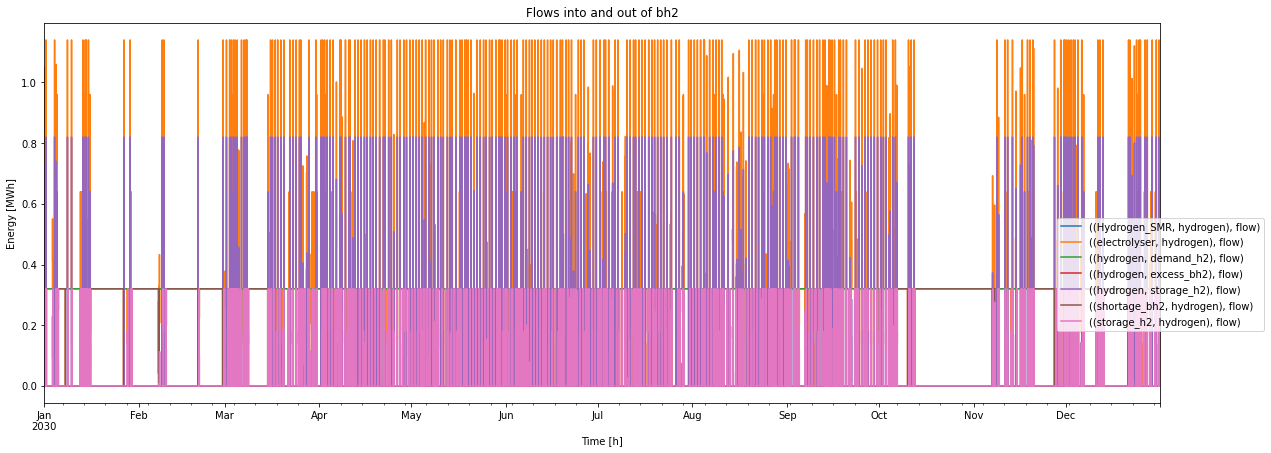

<Figure size 936x360 with 0 Axes>

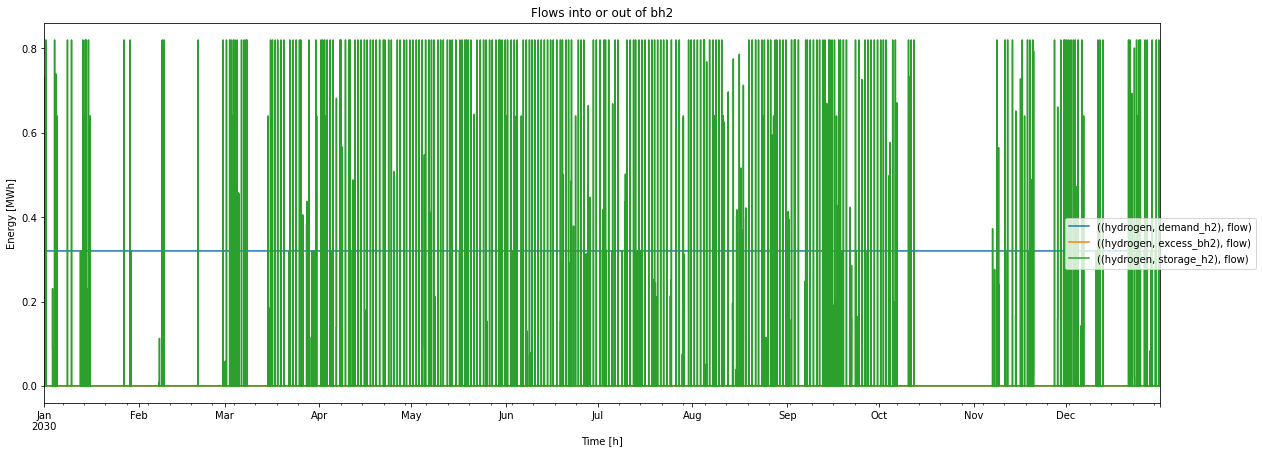

18:17:21-WARNING-Columns that are not part of the order list are removed: [(('shortage_bh2', 'hydrogen'), 'flow'), (('storage_h2', 'hydrogen'), 'flow')]
18:18:01-WARNING-Columns that are not part of the order list are removed: [(('hydrogen', 'excess_bh2'), 'flow'), (('hydrogen', 'storage_h2'), 'flow')]


<Figure size 936x360 with 0 Axes>

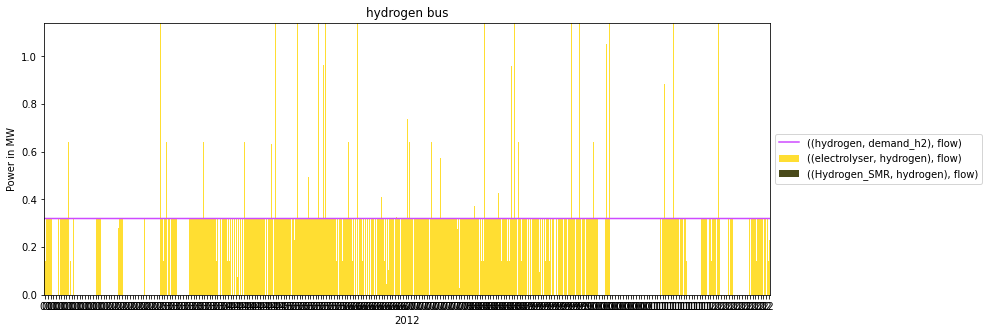

In [2]:
# -*- coding: utf-8 -*-

"""

This program is part of a game-based workshop about energy systems.
During the workshop up to 8 teams design energy systems by selecting and
combining technologies to supply heat and electrical power. Their design
parameter are the simulation input.
This Program calls the energy system simulation (optimization) for
each team and analysis the results based on settings made in
'experimental_config/config.yml'.

Date: 29th of August 2019
Author: Jakob Wolf (jakob.wolf@beuth-hochschule.de)
Licence: GPL-3.0

"""

import os
import sys
from model_energy_system import run_model
from basic_analysis import display_results
import yaml

try:
    from detailed_analysis import my_detailed_analysis
except ImportError:
    my_detailed_analysis = None


def main():
    # Choose configuration file to run model with
    exp_cfg_file_name = 'config.yml'
    config_file_path = os.path.abspath(
        '../experiment_config/' + exp_cfg_file_name)
    with open(config_file_path, 'r') as ymlfile:
        cfg = yaml.load(ymlfile, Loader=yaml.CLoader)

    # global teamdata
    if cfg['run_model']:
        for n in range(cfg['number_of_teams']):
            run_model(config_path=config_file_path, team_number=n)

    # Basic analysis
    if cfg['display_results']:
        for n in range(cfg['number_of_teams']):
                display_results(config_path=config_file_path, team_number=n)
    
    if cfg['run_detailed_analysis']:
        my_detailed_analysis(config_file_path=config_file_path)


main()


